Weather PY

=There is a strong correlation of higher temperatures as you get closer to the equator
-There is not a strong correlation of wind speed and latitude
-There does not apppear to be a correlation between cloudiness and a cities location

-import dependancies and api key

In [31]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import linregress
from pprint import pprint

from config import weather_api_key
from citipy import citipy
import requests


-Add range of search for cities and output location

In [4]:
output_data_file = "output_data/cities.csv"


lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

-create lists to hold location and city -set up random search and identify nearest city to lat-lngs
-print the length of the list to see how many cities

In [5]:

lat_lngs = []
cities = []


lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    

    if city not in cities:
        cities.append(city)


len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


-Create empty lists to hold data

In [6]:
city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
clouds=[]
wind_speed=[]
country=[]
date=[]

record_counter=1
set_counter=1


-base URL and convert to imperial

In [7]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

-FOR each city name in list try the following

In [8]:
for city in cities:
    try:
        query_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url)
        weather_json = response.json()
        city_name.append(weather_json["name"])
        clouds.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json["wind"]["speed"])

        print(f"Processing Record {record_counter} of set {set_counter} | {city}") 
    
    except KeyError:
        print(f"City not found. {city}...")
    
    record_counter = record_counter + 1
    if record_counter == 51:
        record_counter = 1
        set_counter = set_counter + 1
        




City not found. jabiru...
City not found. tsihombe...
City not found. nizhneyansk...
City not found. mocambique...
City not found. mys shmidta...
City not found. belushya guba...
City not found. vaitupu...
City not found. samusu...
City not found. taolanaro...
City not found. sofiysk...
City not found. illoqqortoormiut...
City not found. labutta...
City not found. barentsburg...
City not found. tumannyy...
City not found. blonduos...
City not found. sentyabrskiy...
City not found. ngukurr...
City not found. amderma...
City not found. karaul...
City not found. tawkar...
City not found. guajara-mirim...
City not found. grand river south east...
City not found. dzhusaly...
City not found. mahaicony...
City not found. karamay...
City not found. makung...
City not found. thilogne...
City not found. andevoranto...
City not found. ruatoria...
City not found. fevralsk...
City not found. bur gabo...
City not found. bajo baudo...
City not found. gorno-chuyskiy...
City not found. alotau...
City n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dictionary={
    "City": city_name,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed":wind_speed,
    "Country": country,
    "Date": date
}
                        
weather_df = pd.DataFrame(weather_dictionary)
weather_df.drop_duplicates("City")

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coahuayana Viejo,18.7333,-103.6833,88.95,61,95,2.62,MX,1659547429
1,Vila Velha,-20.3297,-40.2925,78.75,85,40,13.80,BR,1659547579
2,Hobart,-42.8794,147.3294,49.26,88,75,4.61,AU,1659547470
3,Teguise,29.0605,-13.5640,77.22,65,20,21.85,ES,1659547644
4,Avarua,-21.2078,-159.7750,71.65,56,40,8.05,CK,1659547644
...,...,...,...,...,...,...,...,...,...
548,Mersing,2.4312,103.8405,75.11,94,40,2.30,MY,1659547781
549,Bragança,-1.0536,-46.7656,85.98,59,77,7.18,BR,1659547686
550,Farafangana,-22.8167,47.8333,68.16,75,100,6.49,MG,1659547781
551,Tabou,4.4230,-7.3528,76.42,75,97,8.75,CI,1659547651


In [14]:
weather_df.head(50)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coahuayana Viejo,18.7333,-103.6833,88.95,61,95,2.62,MX,1659547429
1,Vila Velha,-20.3297,-40.2925,78.75,85,40,13.80,BR,1659547579
2,Hobart,-42.8794,147.3294,49.26,88,75,4.61,AU,1659547470
3,Teguise,29.0605,-13.5640,77.22,65,20,21.85,ES,1659547644
4,Avarua,-21.2078,-159.7750,71.65,56,40,8.05,CK,1659547644
5,Isangel,-19.5500,169.2667,74.91,88,0,5.59,VU,1659547645
6,Mataura,-46.1927,168.8643,44.47,89,100,3.11,NZ,1659547645
7,Khatanga,71.9667,102.5000,49.60,66,92,6.98,RU,1659547645
8,Albany,42.6001,-73.9662,86.65,48,2,1.61,US,1659546842
9,Lavrentiya,65.5833,-171.0000,48.61,78,3,4.88,RU,1659547604


-Export listof cities to csv

In [16]:
weather_df.to_csv("C:/Users/krcon/OneDrive/Desktop/Class Master Folder/Challenge6APIs/citiescsv.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

-Check to see if any humidy is over 100%

In [17]:
weather_data=pd.DataFrame(weather_dictionary)
weather_data.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coahuayana Viejo,18.7333,-103.6833,88.95,61,95,2.62,MX,1659547429
1,Vila Velha,-20.3297,-40.2925,78.75,85,40,13.80,BR,1659547579
2,Hobart,-42.8794,147.3294,49.26,88,75,4.61,AU,1659547470
3,Teguise,29.0605,-13.5640,77.22,65,20,21.85,ES,1659547644
4,Avarua,-21.2078,-159.7750,71.65,56,40,8.05,CK,1659547644


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Create plots-
    Lat versus Temp

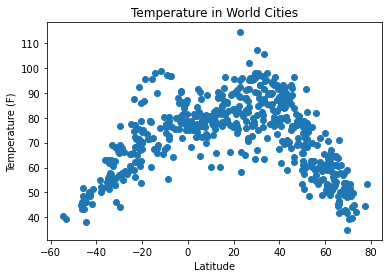

In [19]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], marker="o")

plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid=True

plt.show()

## Latitude vs. Humidity Plot

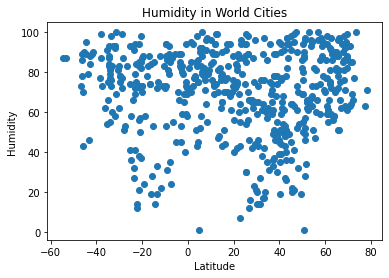

In [20]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid=True

plt.show()

## Latitude vs. Cloudiness Plot

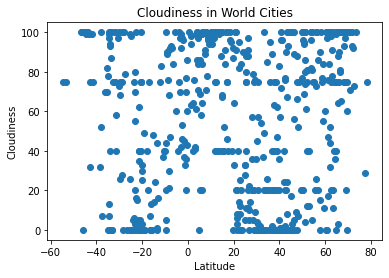

In [21]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid=True

plt.show()

## Latitude vs. Wind Speed Plot

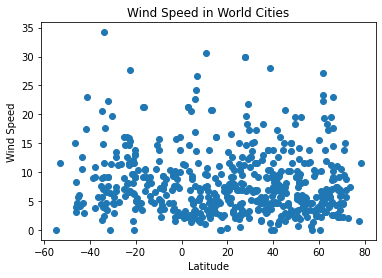

In [22]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid=True

plt.show()

## Linear Regression

-Create northern hemisphere and southern hemisphere dataframe|

In [33]:
north_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
south_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [34]:
x_values=south_df["Latitude"]
y_values=south_df["Max Temp"]
regress_values= x_values*slope+intercept


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp vs. Latitude Linear Regression for Southern Hemisphere")
print(f"r-value: {rvalue}")
print(f"The data shows there is a positive correlation between latitude and max temperatures")

plt.show()



NameError: name 'slope' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


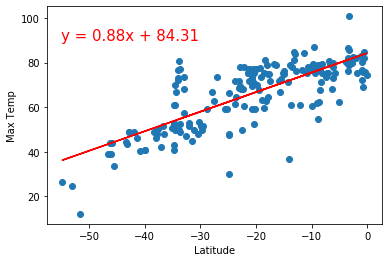

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


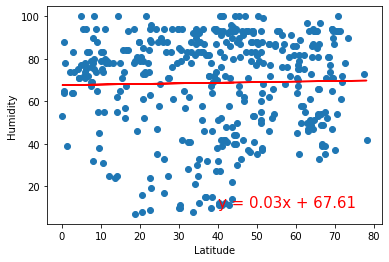

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


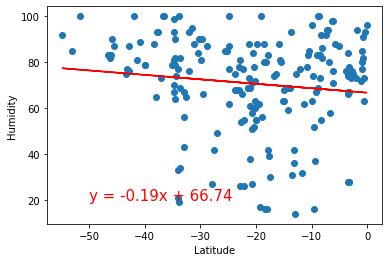

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


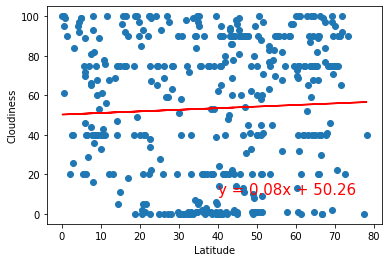

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


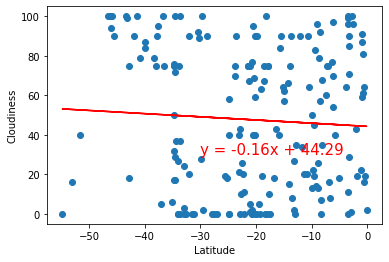

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


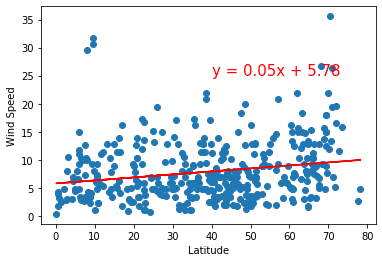

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


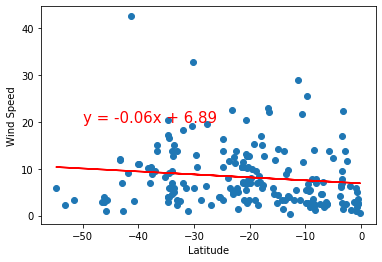